## Importing the relevant packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from math import sqrt
import seaborn as sns
sns.set()

C:\Users\YOUNIS\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


## Importing the Data and Pre-processing 

In [2]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [3]:
df_comp['market_value']=df_comp.ftse

In [4]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [5]:
import warnings
warnings.filterwarnings("ignore")

## The LLR Test

In [6]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit(start_ar_lags = 11).llf
    L2 = mod_2.fit(start_ar_lags = 11).llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

## Creating Returns

In [7]:
df['returns'] = df.market_value.pct_change(1)*100

## Creating Squared Returns

In [8]:
df['sq_returns'] = df.returns.mul(df.returns)

## Returns vs Squared Returns

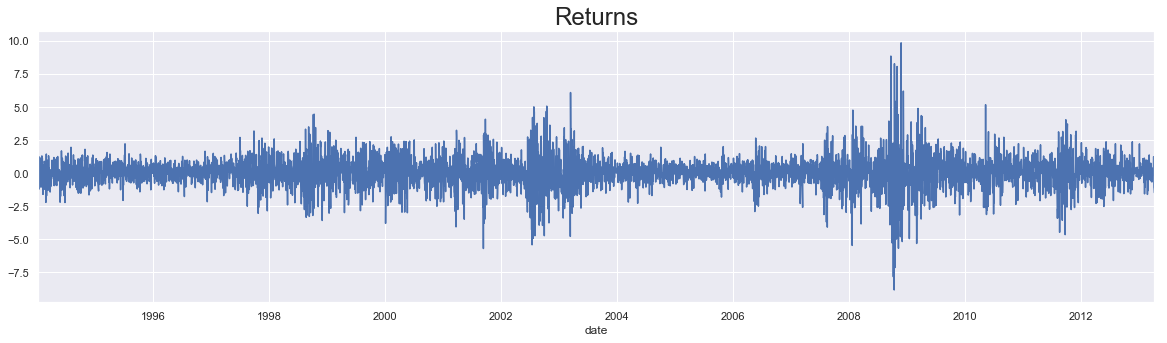

In [9]:
df.returns.plot(figsize=(20,5))
plt.title("Returns",size=24)
plt.show()

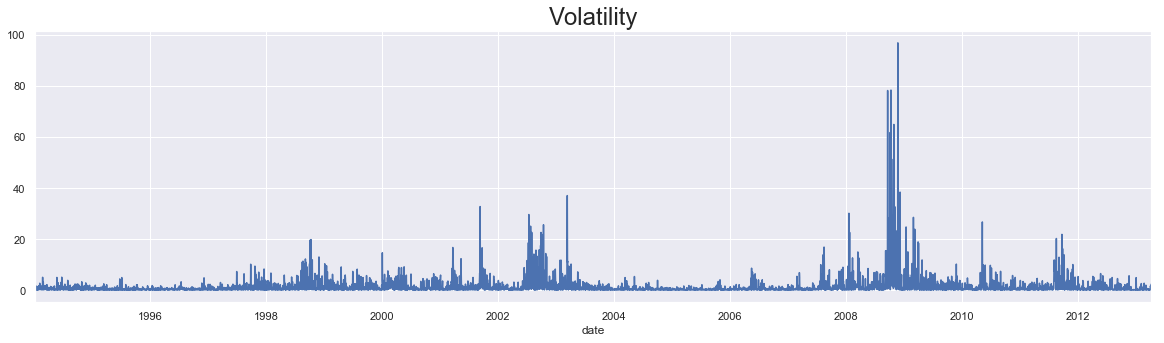

In [10]:
df.sq_returns.plot(figsize=(20,5))
plt.title("Volatility",size=24)
plt.show()

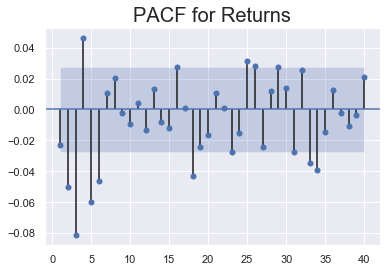

In [13]:
sgt.plot_pacf(df.returns[1:], zero=False, lags=40 , alpha=0.05, method='ols')
plt.title("PACF for Returns", size= 20)
plt.show()

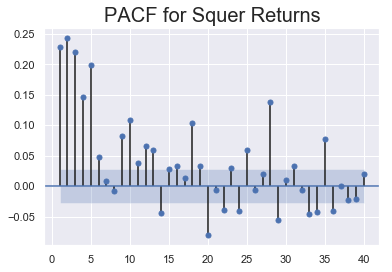

In [14]:
sgt.plot_pacf(df.sq_returns[1:], zero=False, lags=40 , alpha=0.05, method='ols')
plt.title("PACF for Squer Returns", size= 20)
plt.show()

## The arch_model() Method

In [15]:
from arch import arch_model_model

In [17]:
model_arch1 = arch_model(df.returns[1:],mean="Constant", vol="ARCH", p=1)
results_arch1 = model_arch1.fit()
results_arch1.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 7661.953060893903
Iteration:      2,   Func. Count:     14,   Neg. LLF: 7661.175116935157
Iteration:      3,   Func. Count:     22,   Neg. LLF: 7660.278630806879
Iteration:      4,   Func. Count:     29,   Neg. LLF: 7660.098463946289
Iteration:      5,   Func. Count:     34,   Neg. LLF: 7660.088789377838
Iteration:      6,   Func. Count:     39,   Neg. LLF: 7660.088782040906
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7660.088782040875
            Iterations: 6
            Function evaluations: 39
            Gradient evaluations: 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                       ARCH   Log-Likelihood:               -7660.09
Distribution:                  Normal   AIC:                           15326.2
Method:            Maximum Likelihood   BIC:                           15345.7
                                        No. Observations:                 5020
Date:                Mon, Apr 13 2020   Df Residuals:                     5017
Time:                        04:34:23   Df Model:                            3
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0345  1.603e-02      2.151  3.147e-02 [3.063e-03,6.590e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.9206  4.309e-02     21.365 2.855e-101 [  0.836,  1.005]
alpha[1]       0.3684  5.040e-02      7.310  2.673e-13 [  0.270,  0.467]
========================================================================

Covariance estimator: robust
"""

## The Simple ARCH(1) 

In [23]:
model_arch1 = arch_model(df.returns[1:],mean="zero", vol="ARCH", p=1,dist="ged")
results_arch1 = model_arch1.fit()
results_arch1.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 7431.49689023465
Iteration:      2,   Func. Count:     11,   Neg. LLF: 7416.387186576778
Iteration:      3,   Func. Count:     17,   Neg. LLF: 7376.672519849464
Iteration:      4,   Func. Count:     24,   Neg. LLF: 7366.771860149601
Iteration:      5,   Func. Count:     30,   Neg. LLF: 7341.8030116224
Iteration:      6,   Func. Count:     35,   Neg. LLF: 7339.790446417606
Iteration:      7,   Func. Count:     41,   Neg. LLF: 7337.392731221262
Iteration:      8,   Func. Count:     47,   Neg. LLF: 7336.367239999246
Iteration:      9,   Func. Count:     52,   Neg. LLF: 7336.362701572536
Iteration:     10,   Func. Count:     57,   Neg. LLF: 7336.3624763535445
Iteration:     11,   Func. Count:     62,   Neg. LLF: 7336.36243684175
Iteration:     12,   Func. Count:     67,   Neg. LLF: 7336.3624307665095
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7336.36243076662
            Iterations: 12
   

<class 'statsmodels.iolib.summary.Summary'>
"""
                              Zero Mean - ARCH Model Results                              
==========================================================================================
Dep. Variable:                            returns   R-squared:                       0.000
Mean Model:                             Zero Mean   Adj. R-squared:                  0.000
Vol Model:                                   ARCH   Log-Likelihood:               -7336.36
Distribution:      Generalized Error Distribution   AIC:                           14678.7
Method:                        Maximum Likelihood   BIC:                           14698.3
                                                    No. Observations:                 5020
Date:                            Mon, Apr 13 2020   Df Residuals:                     5017
Time:                                    04:43:20   Df Model:                            3
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.9258  3.805e-02     24.329 9.740e-131 [  0.851,  1.000]
alpha[1]       0.3468  3.911e-02      8.868  7.468e-19 [  0.270,  0.423]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             1.0500  3.421e-02     30.693 7.102e-207 [  0.983,  1.117]
========================================================================

Covariance estimator: robust
"""

In [22]:
model_arch1 = arch_model(df.returns[1:],mean="AR",lags=[2,4,6], vol="ARCH", p=1, dist="t")
results_arch1 = model_arch1.fit()
results_arch1.summary()

Iteration:      1,   Func. Count:      9,   Neg. LLF: 7359.040711110447
Iteration:      2,   Func. Count:     22,   Neg. LLF: 7351.59109304248
Iteration:      3,   Func. Count:     35,   Neg. LLF: 7351.46422082149
Iteration:      4,   Func. Count:     47,   Neg. LLF: 7351.225755104874
Iteration:      5,   Func. Count:     57,   Neg. LLF: 7344.210385347518
Iteration:      6,   Func. Count:     69,   Neg. LLF: 7344.139566287444
Iteration:      7,   Func. Count:     79,   Neg. LLF: 7340.232733961375
Iteration:      8,   Func. Count:     89,   Neg. LLF: 7335.184432162314
Iteration:      9,   Func. Count:     99,   Neg. LLF: 7333.607716734594
Iteration:     10,   Func. Count:    108,   Neg. LLF: 7331.388263413932
Iteration:     11,   Func. Count:    117,   Neg. LLF: 7330.9477516609795
Iteration:     12,   Func. Count:    126,   Neg. LLF: 7330.616110369174
Iteration:     13,   Func. Count:    135,   Neg. LLF: 7330.590523491084
Iteration:     14,   Func. Count:    144,   Neg. LLF: 7330.587396

<class 'statsmodels.iolib.summary.Summary'>
"""
                              AR - ARCH Model Results                               
====================================================================================
Dep. Variable:                      returns   R-squared:                       0.003
Mean Model:                              AR   Adj. R-squared:                  0.002
Vol Model:                             ARCH   Log-Likelihood:               -7330.59
Distribution:      Standardized Student's t   AIC:                           14675.2
Method:                  Maximum Likelihood   BIC:                           14720.8
                                              No. Observations:                 5014
Date:                      Mon, Apr 13 2020   Df Residuals:                     5007
Time:                              04:42:54   Df Model:                            7
                                   Mean Model                                  
===============================================================================
                  coef    std err          t      P>|t|        95.0% Conf. Int.
-------------------------------------------------------------------------------
Const           0.0525  1.326e-02      3.961  7.473e-05   [2.652e-02,7.848e-02]
returns[2]     -0.0303  1.815e-02     -1.667  9.542e-02  [-6.582e-02,5.307e-03]
returns[4] -2.3461e-03  1.785e-02     -0.131      0.895  [-3.732e-02,3.263e-02]
returns[6]     -0.0394  1.870e-02     -2.108  3.500e-02 [-7.608e-02,-2.775e-03]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          1.0097  5.178e-02     19.501  1.078e-84 [  0.908,  1.111]
alpha[1]       0.3608  4.195e-02      8.599  8.020e-18 [  0.279,  0.443]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             3.7700      0.213     17.710  3.523e-70 [  3.353,  4.187]
========================================================================

Covariance estimator: robust
"""

## Higher-Lag ARCH Models

In [24]:
model_arch2 = arch_model(df.returns[1:],mean="Constant", vol="ARCH", p=2)
results_arch2 = model_arch2.fit()
results_arch2.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 7453.218168137268
Iteration:      2,   Func. Count:     16,   Neg. LLF: 7451.916962214617
Iteration:      3,   Func. Count:     26,   Neg. LLF: 7451.8651812702465
Iteration:      4,   Func. Count:     34,   Neg. LLF: 7450.94727819419
Iteration:      5,   Func. Count:     41,   Neg. LLF: 7449.870533644225
Iteration:      6,   Func. Count:     49,   Neg. LLF: 7449.567251832594
Iteration:      7,   Func. Count:     55,   Neg. LLF: 7449.551200477554
Iteration:      8,   Func. Count:     61,   Neg. LLF: 7449.545177542715
Iteration:      9,   Func. Count:     67,   Neg. LLF: 7449.545164098206
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7449.545164098316
            Iterations: 9
            Function evaluations: 67
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                       ARCH   Log-Likelihood:               -7449.55
Distribution:                  Normal   AIC:                           14907.1
Method:            Maximum Likelihood   BIC:                           14933.2
                                        No. Observations:                 5020
Date:                Mon, Apr 13 2020   Df Residuals:                     5016
Time:                        04:46:12   Df Model:                            4
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0484  1.401e-02      3.455  5.495e-04 [2.095e-02,7.585e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.6978  3.564e-02     19.580  2.272e-85 [  0.628,  0.768]
alpha[1]       0.2202  3.474e-02      6.339  2.311e-10 [  0.152,  0.288]
alpha[2]       0.2783  3.645e-02      7.635  2.260e-14 [  0.207,  0.350]
========================================================================

Covariance estimator: robust
"""

In [25]:
model_arch3 = arch_model(df.returns[1:],mean="Constant", vol="ARCH", p=3)
results_arch3 = model_arch3.fit()
results_arch3.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 7289.178838894864
Iteration:      2,   Func. Count:     19,   Neg. LLF: 7284.862025692901
Iteration:      3,   Func. Count:     29,   Neg. LLF: 7283.951199644037
Iteration:      4,   Func. Count:     37,   Neg. LLF: 7279.41863889161
Iteration:      5,   Func. Count:     45,   Neg. LLF: 7278.805807411393
Iteration:      6,   Func. Count:     53,   Neg. LLF: 7277.414483176046
Iteration:      7,   Func. Count:     62,   Neg. LLF: 7277.387665552348
Iteration:      8,   Func. Count:     70,   Neg. LLF: 7277.07191418312
Iteration:      9,   Func. Count:     77,   Neg. LLF: 7277.050581165547
Iteration:     10,   Func. Count:     84,   Neg. LLF: 7277.050453152619
Iteration:     11,   Func. Count:     91,   Neg. LLF: 7277.0504521483745
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7277.050452148393
            Iterations: 11
            Function evaluations: 91
            Gradient evaluations: 11

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                       ARCH   Log-Likelihood:               -7277.05
Distribution:                  Normal   AIC:                           14564.1
Method:            Maximum Likelihood   BIC:                           14596.7
                                        No. Observations:                 5020
Date:                Mon, Apr 13 2020   Df Residuals:                     5015
Time:                        04:47:18   Df Model:                            5
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0529  1.316e-02      4.018  5.875e-05 [2.707e-02,7.865e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.5012  2.834e-02     17.685  5.505e-70 [  0.446,  0.557]
alpha[1]       0.1570  2.649e-02      5.926  3.108e-09 [  0.105,  0.209]
alpha[2]       0.2197  2.588e-02      8.489  2.077e-17 [  0.169,  0.270]
alpha[3]       0.2804  3.354e-02      8.359  6.302e-17 [  0.215,  0.346]
========================================================================

Covariance estimator: robust
"""

In [26]:
model_arch5 = arch_model(df.returns[1:],mean="Constant", vol="ARCH", p=5)
results_arch5= model_arch5.fit()
results_arch5.summary()

Iteration:      1,   Func. Count:      9,   Neg. LLF: 7121.230048873085
Iteration:      2,   Func. Count:     23,   Neg. LLF: 7116.26434757695
Iteration:      3,   Func. Count:     35,   Neg. LLF: 7116.120378666206
Iteration:      4,   Func. Count:     46,   Neg. LLF: 7115.074950682874
Iteration:      5,   Func. Count:     57,   Neg. LLF: 7114.313441549266
Iteration:      6,   Func. Count:     68,   Neg. LLF: 7113.290378065645
Iteration:      7,   Func. Count:     79,   Neg. LLF: 7112.8930645529
Iteration:      8,   Func. Count:     90,   Neg. LLF: 7112.544309800054
Iteration:      9,   Func. Count:    100,   Neg. LLF: 7111.938960104862
Iteration:     10,   Func. Count:    111,   Neg. LLF: 7111.9037077291405
Iteration:     11,   Func. Count:    120,   Neg. LLF: 7111.886056404592
Iteration:     12,   Func. Count:    129,   Neg. LLF: 7111.884413654199
Iteration:     13,   Func. Count:    138,   Neg. LLF: 7111.884334727019
Optimization terminated successfully.    (Exit mode 0)
           

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                       ARCH   Log-Likelihood:               -7111.88
Distribution:                  Normal   AIC:                           14237.8
Method:            Maximum Likelihood   BIC:                           14283.4
                                        No. Observations:                 5020
Date:                Mon, Apr 13 2020   Df Residuals:                     5013
Time:                        04:49:18   Df Model:                            7
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0562  1.225e-02      4.585  4.545e-06 [3.216e-02,8.020e-02]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.3429  2.374e-02     14.445  2.677e-47   [  0.296,  0.389]
alpha[1]       0.1053  2.119e-02      4.967  6.812e-07 [6.373e-02,  0.147]
alpha[2]       0.1726  2.216e-02      7.788  6.813e-15   [  0.129,  0.216]
alpha[3]       0.1780  2.547e-02      6.989  2.766e-12   [  0.128,  0.228]
alpha[4]       0.1604  2.199e-02      7.293  3.036e-13   [  0.117,  0.203]
alpha[5]       0.1444  2.096e-02      6.887  5.678e-12   [  0.103,  0.185]
==========================================================================

Covariance estimator: robust
"""

In [27]:
model_arch7 = arch_model(df.returns[1:],mean="Constant", vol="ARCH", p=7)
results_arch7 = model_arch7.fit()
results_arch7.summary()

Iteration:      1,   Func. Count:     11,   Neg. LLF: 7058.883561110502
Iteration:      2,   Func. Count:     27,   Neg. LLF: 7053.301268584362
Iteration:      3,   Func. Count:     40,   Neg. LLF: 7049.922600946407
Iteration:      4,   Func. Count:     54,   Neg. LLF: 7049.759115030606
Iteration:      5,   Func. Count:     67,   Neg. LLF: 7048.815734312766
Iteration:      6,   Func. Count:     80,   Neg. LLF: 7047.409058810171
Iteration:      7,   Func. Count:     93,   Neg. LLF: 7046.019110051893
Iteration:      8,   Func. Count:    106,   Neg. LLF: 7044.834285893588
Iteration:      9,   Func. Count:    119,   Neg. LLF: 7044.048122819417
Iteration:     10,   Func. Count:    131,   Neg. LLF: 7043.416184897713
Iteration:     11,   Func. Count:    144,   Neg. LLF: 7043.155667256306
Iteration:     12,   Func. Count:    157,   Neg. LLF: 7043.052476711088
Iteration:     13,   Func. Count:    170,   Neg. LLF: 7042.962014554574
Iteration:     14,   Func. Count:    182,   Neg. LLF: 7042.95758

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                       ARCH   Log-Likelihood:               -7042.93
Distribution:                  Normal   AIC:                           14103.9
Method:            Maximum Likelihood   BIC:                           14162.6
                                        No. Observations:                 5020
Date:                Mon, Apr 13 2020   Df Residuals:                     5011
Time:                        04:49:42   Df Model:                            9
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0576  1.185e-02      4.863  1.154e-06 [3.442e-02,8.088e-02]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.2628  2.278e-02     11.537  8.598e-31   [  0.218,  0.307]
alpha[1]       0.0678  1.766e-02      3.837  1.247e-04 [3.314e-02,  0.102]
alpha[2]       0.1334  2.015e-02      6.620  3.589e-11 [9.391e-02,  0.173]
alpha[3]       0.1642  2.742e-02      5.987  2.137e-09   [  0.110,  0.218]
alpha[4]       0.1182  2.171e-02      5.443  5.228e-08 [7.564e-02,  0.161]
alpha[5]       0.1308  1.955e-02      6.690  2.229e-11 [9.248e-02,  0.169]
alpha[6]       0.1305  1.991e-02      6.554  5.613e-11 [9.146e-02,  0.170]
alpha[7]       0.0806  2.061e-02      3.912  9.169e-05 [4.023e-02,  0.121]
==========================================================================

Covariance estimator: robust
"""

In [28]:
model_arch13 = arch_model(df.returns[1:],mean="Constant", vol="ARCH", p=13)
results_arch13 = model_arch13.fit()
results_arch13.summary()

Iteration:      1,   Func. Count:     17,   Neg. LLF: 7008.351933726692
Iteration:      2,   Func. Count:     38,   Neg. LLF: 7005.645464723559
Iteration:      3,   Func. Count:     56,   Neg. LLF: 7000.21861541643
Iteration:      4,   Func. Count:     74,   Neg. LLF: 6996.900612814239
Iteration:      5,   Func. Count:     93,   Neg. LLF: 6996.500043707073
Iteration:      6,   Func. Count:    112,   Neg. LLF: 6993.964852208415
Iteration:      7,   Func. Count:    131,   Neg. LLF: 6991.367903687866
Iteration:      8,   Func. Count:    150,   Neg. LLF: 6988.563717758885
Iteration:      9,   Func. Count:    169,   Neg. LLF: 6986.3512738286645
Iteration:     10,   Func. Count:    188,   Neg. LLF: 6985.661375673177
Iteration:     11,   Func. Count:    207,   Neg. LLF: 6985.316616748046
Iteration:     12,   Func. Count:    226,   Neg. LLF: 6984.886254450972
Iteration:     13,   Func. Count:    245,   Neg. LLF: 6984.581292139312
Iteration:     14,   Func. Count:    264,   Neg. LLF: 6984.49349

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                       ARCH   Log-Likelihood:               -6984.18
Distribution:                  Normal   AIC:                           13998.4
Method:            Maximum Likelihood   BIC:                           14096.2
                                        No. Observations:                 5020
Date:                Mon, Apr 13 2020   Df Residuals:                     5005
Time:                        04:50:04   Df Model:                           15
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0492  1.206e-02      4.077  4.566e-05 [2.553e-02,7.281e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.1871  2.210e-02      8.466  2.538e-17      [  0.144,  0.230]
alpha[1]       0.0568  1.729e-02      3.282  1.029e-03  [2.287e-02,9.065e-02]
alpha[2]       0.1156  2.017e-02      5.733  9.840e-09    [7.610e-02,  0.155]
alpha[3]       0.1265  2.625e-02      4.820  1.433e-06    [7.509e-02,  0.178]
alpha[4]       0.0884  2.159e-02      4.093  4.265e-05    [4.605e-02,  0.131]
alpha[5]       0.0695  1.750e-02      3.970  7.189e-05    [3.518e-02,  0.104]
alpha[6]       0.0865  1.926e-02      4.491  7.092e-06    [4.874e-02,  0.124]
alpha[7]       0.0404  1.846e-02      2.188  2.870e-02  [4.203e-03,7.658e-02]
alpha[8]       0.0654  1.833e-02      3.565  3.633e-04    [2.943e-02,  0.101]
alpha[9]       0.0292  1.603e-02      1.820  6.877e-02 [-2.245e-03,6.058e-02]
alpha[10]      0.0335  1.605e-02      2.089  3.670e-02  [2.072e-03,6.498e-02]
alpha[11]      0.0775  1.760e-02      4.403  1.067e-05    [4.300e-02,  0.112]
alpha[12]      0.0473  1.873e-02      2.526  1.153e-02  [1.060e-02,8.402e-02]
alpha[13]      0.0372  1.431e-02      2.600  9.317e-03  [9.162e-03,6.526e-02]
=============================================================================

Covariance estimator: robust
"""